<a href="https://colab.research.google.com/github/Msurya-05/surya/blob/main/day2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Cell 1: Install OpenCV
print("Ensuring OpenCV is installed...")
# `opencv-python` provides the core OpenCV library
!pip install opencv-python matplotlib Pillow

print("\nInstallation/check complete. Proceed to next cell.")

Ensuring OpenCV is installed...

Installation/check complete. Proceed to next cell.


In [3]:
# Cell 2: Import Libraries, Download Haar Cascade, and Load Image

import cv2 # OpenCV library
import matplotlib.pyplot as plt
from PIL import Image # For displaying with matplotlib.pyplot
import numpy as np
import time
from google.colab import files # For image upload
import os

print("Importing libraries and preparing...")

# --- Download Haar Cascade XML file ---
# This file contains the pre-trained model for face detection.
haar_cascade_url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
haar_cascade_filename = 'haarcascade_frontalface_default.xml'

print(f"Downloading Haar Cascade file: {haar_cascade_filename}...")
if not os.path.exists(haar_cascade_filename):
    !wget {haar_cascade_url} -O {haar_cascade_filename}
    print("Download complete.")
else:
    print("Haar Cascade file already exists.")


# --- Upload your image ---
print("\nUploading your image...")
uploaded = files.upload()

# Get the name of the uploaded file (assuming only one file is uploaded)
image_filename = next(iter(uploaded))

# --- Load the image ---
# OpenCV reads images as BGR by default, and as a NumPy array
img_bgr = cv2.imread(image_filename)

if img_bgr is None:
    print(f"Error: Could not load image from {image_filename}. Check file path.")
else:
    # Convert BGR to RGB for matplotlib display (matplotlib expects RGB)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Get image dimensions for matplotlib figure size
    height, width, _ = img_rgb.shape # OpenCV image (NumPy array) gives (height, width, channels)
    fig_width = 15 # Set a base width for the figure
    fig_height = fig_width * (height / width) # Adjust height proportionally

    print(f"Image '{image_filename}' loaded. Dimensions: {width}x{height}")


Importing libraries and preparing...
--2025-06-27 09:54:05--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2025-06-27 09:54:05 (15.2 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

Download complete.

Uploading your image...


Saving WhatsApp Image 2025-06-27 at 15.25.53.jpeg to WhatsApp Image 2025-06-27 at 15.25.53.jpeg
Image 'WhatsApp Image 2025-06-27 at 15.25.53.jpeg' loaded. Dimensions: 1280x963



Detecting faces using Haar Cascade Classifier...

--- Detected Faces ---
  Face found at X: 525, Y: 441, Width: 37, Height: 37


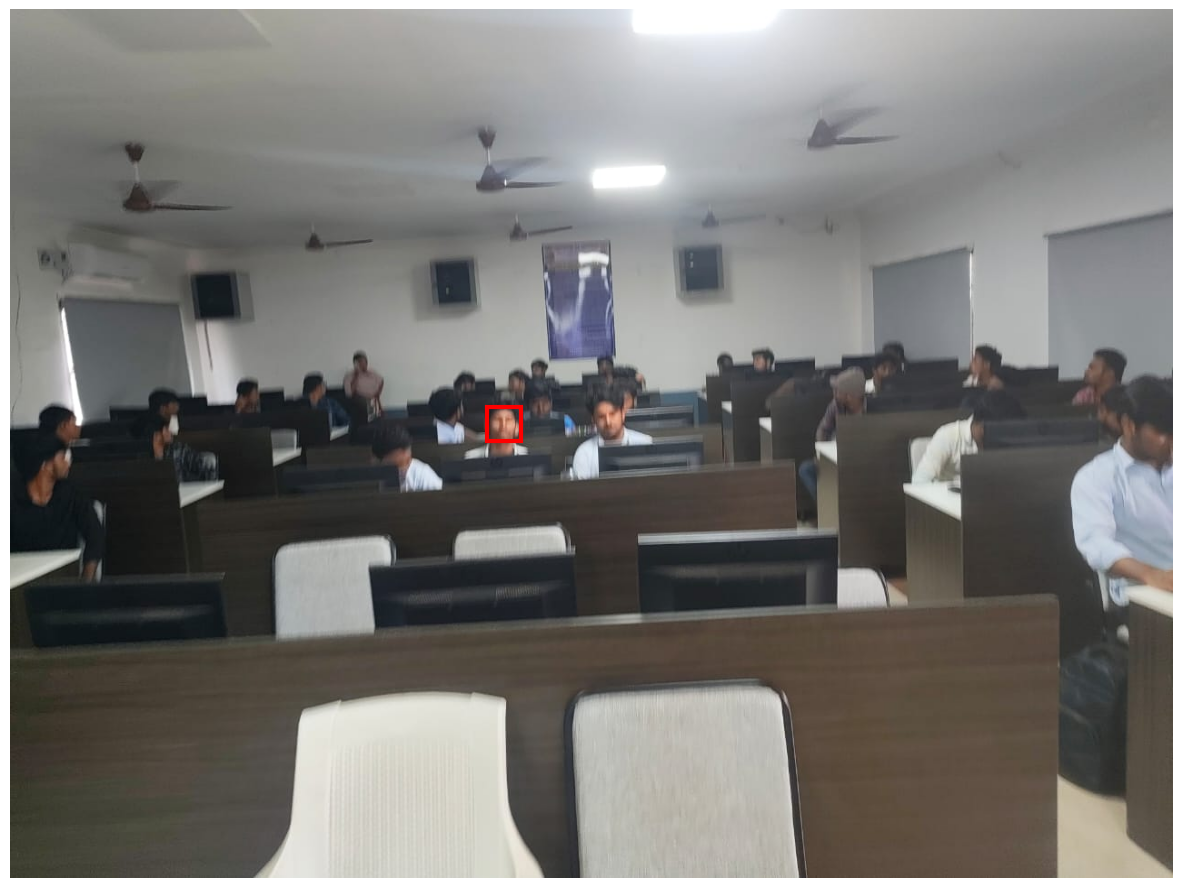


--- Detection Summary ---
Number of faces detected: 1
Time taken for detection: 0.37  seconds


In [4]:
 #Cell 3: Perform Face Detection and Plot Results (using OpenCV)

print("\nDetecting faces using Haar Cascade Classifier...")

# Load the Haar Cascade classifier
face_cascade = cv2.CascadeClassifier(haar_cascade_filename)

# Convert the image to grayscale, which is required for Haar Cascades
gray_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

start = time.time()
# Perform face detection
# detectMultiScale parameters:
# 1.3: scaleFactor - how much the image size is reduced at each image scale
# 5: minNeighbors - how many neighbors each candidate rectangle should have to retain it
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
end = time.time()

# Create the plot
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.imshow(img_rgb, aspect='auto') # Display the RGB image

print("\n--- Detected Faces ---")
# Draw rectangles around the faces
for (x, y, w, h) in faces:
    # x, y are the top-left corner; w, h are width and height
    print(f"  Face found at X: {x}, Y: {y}, Width: {w}, Height: {h}")

    # Create a Rectangle patch (matplotlib expects left, bottom, width, height for patches)
    # However, for images, it's (left, top), width, height
    rect = plt.Rectangle((x, y), w, h, linewidth=3, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Hide axes ticks and labels for a cleaner image
ax.set_axis_off()
plt.show() # Display the plot

print("\n--- Detection Summary ---")
print("Number of faces detected:", len(faces))
print("Time taken for detection:", round(end - start, 2), " seconds")